In [33]:
import statistics
import numpy as np
from PIL import Image
import cv2
import pandas as pd
labeled_dir = str("/home/eric/Documents/cervicalResearchIIP/img_1006t/labeled")
# Dicecの計算
def cal_DiceMulitple(dir, input_name):
    # change the label count as your preference
    Dice = [0] * 11
    Count1 = [0] * 11 #予測結果の各ラベルの要素数
    Count2 = [0] * 11 #ラベル画像の
    Count3 = [0] * 11 #正解した画素数
    
    for index in range(len(input_name)):
        print('index = ', index)

        img1 = cv2.imread(dir + '/' + input_name[index] + ".png", cv2.IMREAD_GRAYSCALE)
        img2 = cv2.imread(labeled_dir + '/' + input_name[index] + ".png", cv2.IMREAD_GRAYSCALE)
        #_, img2 = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY)
        print("予測画像:", dir  + '/' + input_name[index] + ".png")
        print("テストラベル:", labeled_dir + '/' + input_name[index] + ".png")
        unique_label1 = np.unique(img1)
        unique_label2 = np.unique(img2)
        # print(unique_label1)
        # print(unique_label2)
        # change the image array size to your need
        for n in range(256):
            for l in range(256):
                value1 = img1[n,l]
                # for index, uq_value in enumerate(unique_label1):
                #     if(value1 == uq_value):
                #         value1 = index

                Count1[value1] += 1

                value2 = img2[n,l]
                Count2[value2] += 1                    

                if(value1 == value2):
                    Count3[value1] += 1 
    for i in range(11):
        if(Count1[i]+Count2[i] != 0):
            Dice[i] = (2*Count3[i])/(Count1[i] + Count2[i])
        if(Count1[i]+Count2[i] == 0):
            print("")
            #print("4 label case:" + str(input_name[index]))
    Dice.append(statistics.mean(Dice[1:]))
    print('Count1 = ', Count1)
    print('Count2 = ', Count2)
    print('Count3 = ', Count3)
    print('Dice = ', Dice)
    #print(unique_label)

    return Dice


In [34]:
import os
# ファイル名の先頭部分（prefix）により自動的にファイル名を抽出するアルゴリズム。

""" 

Extracts filenames in directory if they start with the prefix input 


Args/Parameters:

    directory_path (string): The path of the dir (ex: /root/home/Documents/etc)
    
    prefix (string): Prefix of the file name (ex: 'Bo' is a prefix of 'Bone')

Returns:

    sorted_file_names (list of str): File names sorted in ascending order in the dir without extension ex: ['bone1', 'bone2', ...]

Raises:

    SomeError: ...

"""

def file_names_with_prefix(directory_path, prefix):

    # Initialize an empty list to store the file names without extensions
    file_names_without_extension = []

    # Loop through all files in the specified directory
    for filename in os.listdir(directory_path):
        #Checking if the file in loop exists in the directory_path not sure how is this necessary
        #??
        if os.path.isfile(os.path.join(directory_path, filename)):
            # Check if the file name starts with the specified prefix
            if filename.startswith(prefix):
                # Get the file name without extension
                name_without_extension, _ = os.path.splitext(filename)

                # Append the file name (without extension) to the list
                file_names_without_extension.append(name_without_extension)

    # Sort the list of file names without extensions in ascending order
    sorted_file_names = sorted(
        file_names_without_extension,
        key=lambda x: (x.split('-')[0], int(x.split('-')[1]))
    )  # Modify this part based on your file naming convention

    # Now you have a sorted list of file names with the specified prefix and without extensions
    return sorted_file_names


In [35]:

#searchdir = str("/home/eric/Documents/cervicalResearchIIP/result_test/1-20250206-Unet-CRF-HP/fold1/crf")
#searchdir = str("/home/eric/Documents/cervicalResearchIIP/result_test/2-20250205-MCunet-CRF-HP/fold1/crf")
#searchdir = str("/home/eric/Documents/cervicalResearchIIP/result_test/3-20250208-TransUnet-CRF-HP/fold1/crf")

#unet
# searchdir = str("/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108")
# #searchdir = str("/home/eric/Documents/cervicalResearchIIP/result_test/MCU-108-21Dil (MRCNN)")
# #mcunet

# #searchdir2 = str("/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU10821-CustomLoss")
# searchdir2 = str("/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss")
# print(searchdir)



# for icisip
searchdir = str("/home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv")
searchdir2 = str("/home/eric/Documents/cervicalResearchIIP/result_test/20250917-MCU-ClaheOnly-Stacked")


index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N1-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-1.png
Count1 =  [58141, 1126, 738, 816, 639, 712, 633, 767, 680, 752, 532]
Count2 =  [57875, 1049, 836, 893, 641, 695, 654, 737, 675, 839, 642]
Count3 =  [57616, 1024, 724, 803, 590, 657, 602, 686, 619, 733, 512]
Dice =  [0.9932423114053234, 0.9416091954022988, 0.9199491740787802, 0.9397308367466355, 0.921875, 0.9339019189765458, 0.9355089355089355, 0.9122340425531915, 0.9136531365313653, 0.9214330609679446, 0.8722316865417377, 0.9212126987307435]
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250917-MCU-ClaheOnly-Stacked/fold4/crf/N1-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-1.png
Count1 =  [58035, 1142, 754, 836, 667, 701, 634, 771, 621, 771, 604]
Count2 =  [57875, 1049, 836, 893, 641, 695, 654, 737, 675, 839, 642]
Count3 =  [57599, 1030, 744, 8

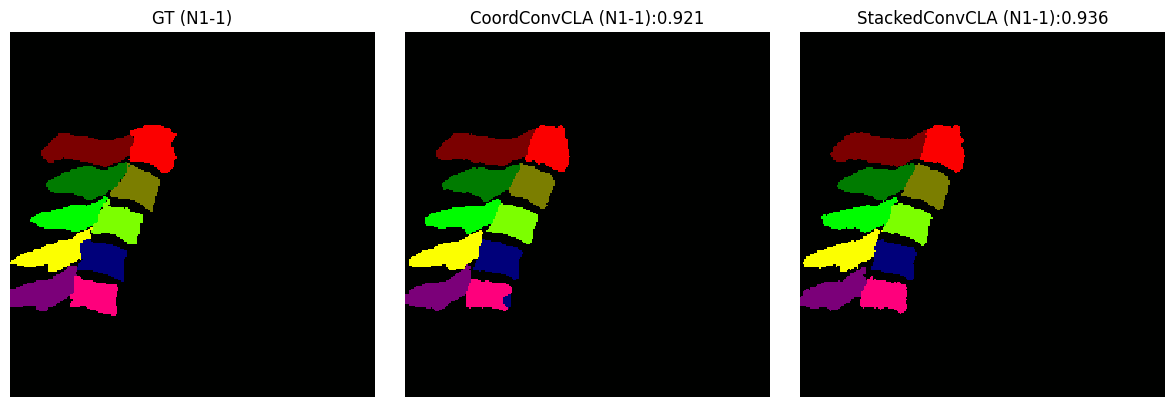

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N1-2.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-2.png
image: N1-2 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N1-3.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-3.png
image: N1-3 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N1-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-4.png
image: N1-4 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N1-5.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-5.png
image: N1-5 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N1-6.png
テストラベル: /home/eric/Documents/cervicalR

[ WARN:0@20083.779] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N1-2.png'): can't open/read file: check file path/integrity
[ WARN:0@20083.779] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250917-MCU-ClaheOnly-Stacked/fold4/crf/N1-2.png'): can't open/read file: check file path/integrity
[ WARN:0@20083.779] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N1-2.png'): can't open/read file: check file path/integrity
[ WARN:0@20083.780] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N1-3.png'): can't open/read file: check file path/integrity
[ WARN:0@20083.780] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250917-MCU-ClaheOnly-S

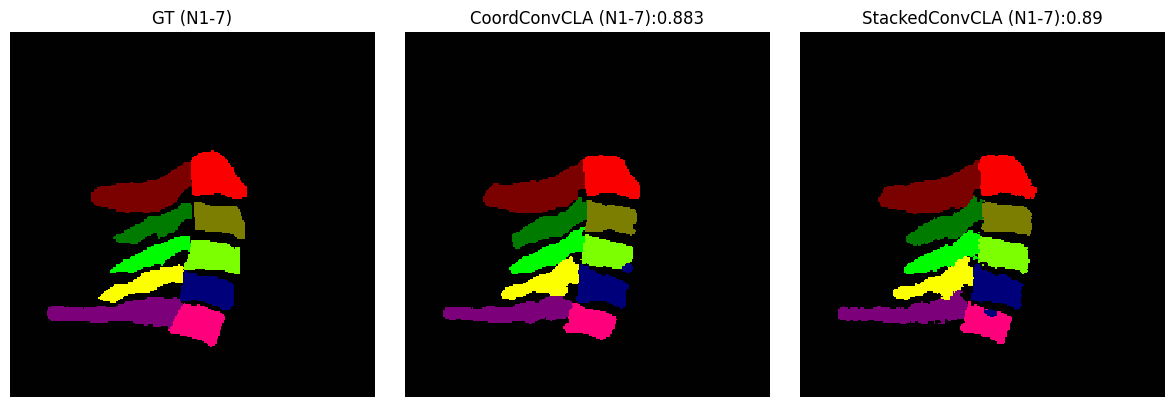

[ WARN:0@20083.962] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N1-8.png'): can't open/read file: check file path/integrity
[ WARN:0@20083.962] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250917-MCU-ClaheOnly-Stacked/fold4/crf/N1-8.png'): can't open/read file: check file path/integrity
[ WARN:0@20083.962] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N1-8.png'): can't open/read file: check file path/integrity
[ WARN:0@20083.963] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N1-9.png'): can't open/read file: check file path/integrity
[ WARN:0@20083.963] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250917-MCU-ClaheOnly-S

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N1-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-8.png
image: N1-8 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N1-9.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-9.png
image: N1-9 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N1-10.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-10.png
image: N1-10 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N2-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-1.png
image: N2-1 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N2-2.png
テストラベル: /home/eric/Documents/cervic

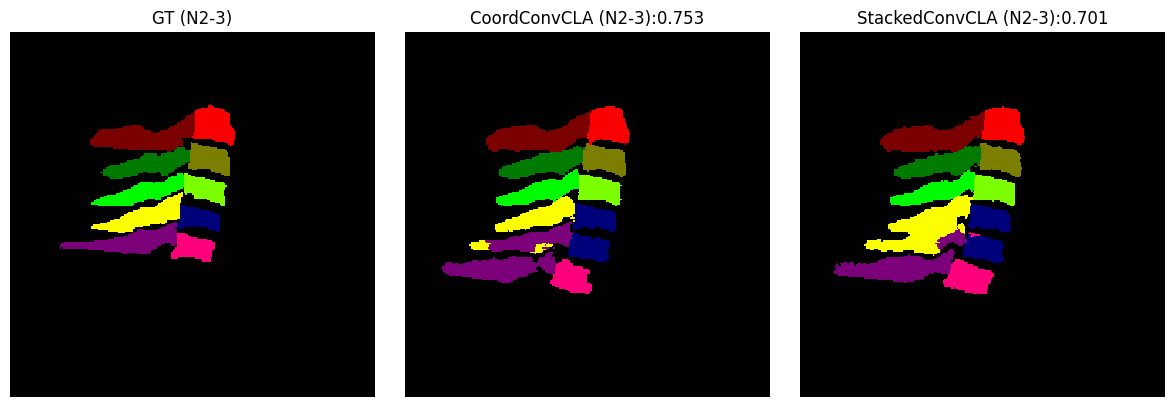

[ WARN:0@20084.149] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N2-4.png'): can't open/read file: check file path/integrity
[ WARN:0@20084.149] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250917-MCU-ClaheOnly-Stacked/fold4/crf/N2-4.png'): can't open/read file: check file path/integrity
[ WARN:0@20084.149] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N2-4.png'): can't open/read file: check file path/integrity
[ WARN:0@20084.150] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N2-5.png'): can't open/read file: check file path/integrity
[ WARN:0@20084.150] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250917-MCU-ClaheOnly-S

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N2-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-4.png
image: N2-4 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N2-5.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-5.png
image: N2-5 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N2-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-6.png
image: N2-6 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N2-7.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-7.png
Count1 =  [57869, 1218, 743, 854, 570, 771, 571, 734, 704, 1151, 351]
Count2 =  [58020, 1306, 714, 840, 584, 737, 577, 689, 503, 1036, 530]
Count3 =  [57454, 1190, 695, 797, 

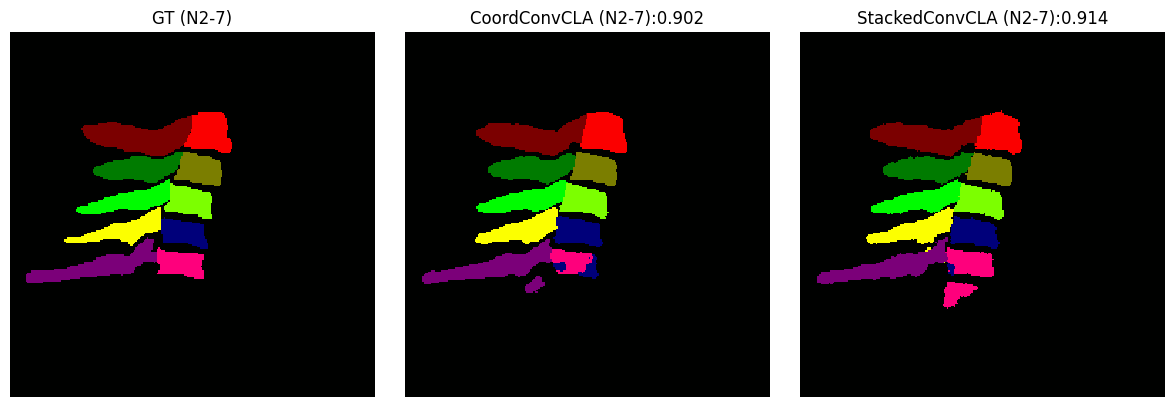

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N2-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-8.png
Count1 =  [58720, 1089, 730, 706, 504, 706, 488, 695, 499, 913, 486]
Count2 =  [58328, 1033, 676, 750, 516, 796, 573, 869, 523, 950, 522]
Count3 =  [57963, 970, 645, 674, 488, 665, 475, 675, 485, 846, 472]
Dice =  [0.9904141890506459, 0.9142318567389256, 0.9174964438122333, 0.9258241758241759, 0.9568627450980393, 0.8854860186418109, 0.8953817153628653, 0.8631713554987213, 0.949119373776908, 0.9082125603864735, 0.9365079365079365, 0.915229418164809]
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250917-MCU-ClaheOnly-Stacked/fold4/crf/N2-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-8.png
Count1 =  [58485, 1148, 748, 773, 504, 721, 499, 740, 489, 942, 487]
Count2 =  [58328, 1033, 676, 750, 516, 796, 573, 869, 523, 950, 522]
Count3 =  [57887, 984, 

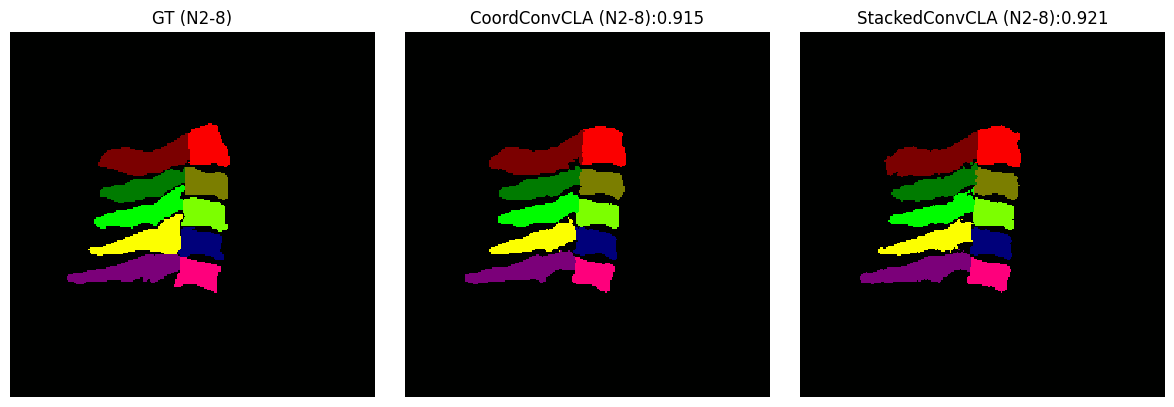

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N2-9.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-9.png
image: N2-9 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N2-10.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-10.png
image: N2-10 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N3-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-1.png
Count1 =  [58942, 1037, 644, 703, 538, 712, 525, 724, 500, 758, 453]
Count2 =  [59164, 1011, 561, 729, 507, 723, 499, 661, 469, 737, 475]
Count3 =  [58627, 964, 555, 651, 492, 669, 467, 637, 432, 666, 425]
Dice =  [0.9927861412629333, 0.94140625, 0.921161825726141, 0.909217877094972, 0.9416267942583733, 0.932404181184669, 0.912109375, 0.91985559566787, 0.891640866873065, 0.8909698

[ WARN:0@20084.519] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N2-9.png'): can't open/read file: check file path/integrity
[ WARN:0@20084.520] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250917-MCU-ClaheOnly-Stacked/fold4/crf/N2-9.png'): can't open/read file: check file path/integrity
[ WARN:0@20084.520] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N2-9.png'): can't open/read file: check file path/integrity
[ WARN:0@20084.521] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N2-10.png'): can't open/read file: check file path/integrity
[ WARN:0@20084.521] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250917-MCU-ClaheOnly-

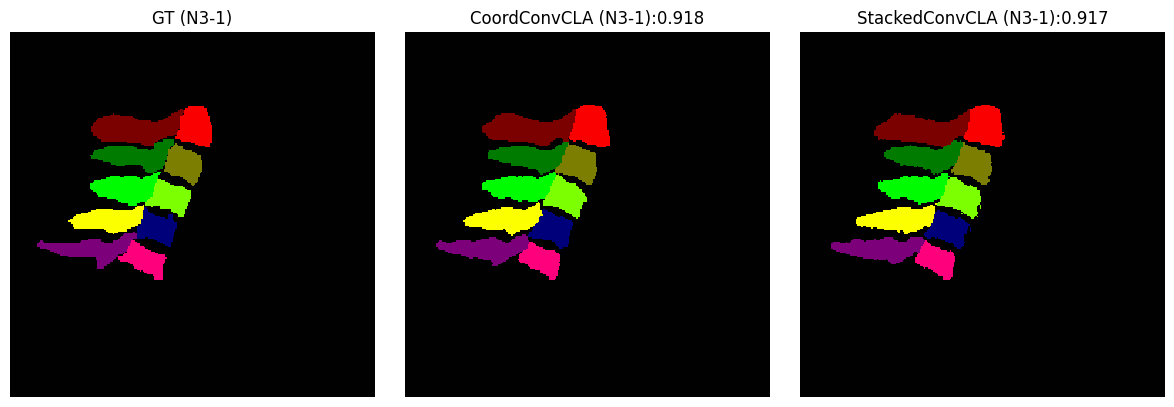

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N3-2.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-2.png
image: N3-2 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N3-3.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-3.png
image: N3-3 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N3-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-4.png
image: N3-4 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N3-5.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-5.png
Count1 =  [59027, 1062, 665, 696, 392, 655, 500, 625, 518, 909, 487]
Count2 =  [59188, 1005, 678, 692, 419, 655, 479, 581, 510, 849, 480]
Count3 =  [58717, 965, 641, 654, 356

[ WARN:0@20084.782] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N3-2.png'): can't open/read file: check file path/integrity
[ WARN:0@20084.782] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250917-MCU-ClaheOnly-Stacked/fold4/crf/N3-2.png'): can't open/read file: check file path/integrity
[ WARN:0@20084.782] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N3-2.png'): can't open/read file: check file path/integrity
[ WARN:0@20084.784] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N3-3.png'): can't open/read file: check file path/integrity
[ WARN:0@20084.784] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250917-MCU-ClaheOnly-S

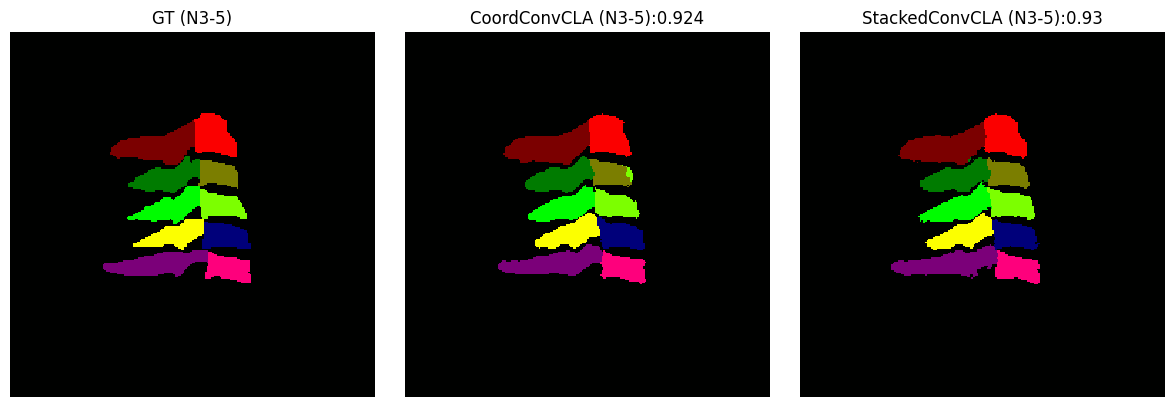

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N3-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-6.png
image: N3-6 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N3-7.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-7.png
image: N3-7 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N3-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-8.png
image: N3-8 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N3-9.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-9.png
image: N3-9 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N3-10.png
テストラベル: /home/eric/Documents/cervical

[ WARN:0@20084.966] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N3-6.png'): can't open/read file: check file path/integrity
[ WARN:0@20084.966] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250917-MCU-ClaheOnly-Stacked/fold4/crf/N3-6.png'): can't open/read file: check file path/integrity
[ WARN:0@20084.966] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N3-6.png'): can't open/read file: check file path/integrity
[ WARN:0@20084.968] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N3-7.png'): can't open/read file: check file path/integrity
[ WARN:0@20084.968] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250917-MCU-ClaheOnly-S

Count1 =  [57247, 1238, 886, 846, 633, 851, 629, 802, 677, 1006, 721]
Count2 =  [57317, 1209, 815, 919, 626, 873, 624, 837, 720, 858, 738]
Count3 =  [56732, 1148, 783, 788, 589, 814, 581, 738, 649, 837, 702]
Dice =  [0.9903983799448344, 0.938291785860237, 0.9206349206349206, 0.8929178470254957, 0.9356632247815727, 0.9443155452436195, 0.9273743016759777, 0.900549115314216, 0.9291338582677166, 0.898068669527897, 0.9623029472241261, 0.9249252215555779]
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250917-MCU-ClaheOnly-Stacked/fold4/crf/N4-2.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-2.png
Count1 =  [57244, 1244, 878, 901, 621, 903, 629, 824, 603, 992, 697]
Count2 =  [57317, 1209, 815, 919, 626, 873, 624, 837, 720, 858, 738]
Count3 =  [56713, 1150, 793, 819, 593, 834, 581, 747, 596, 835, 657]
Dice =  [0.9900926144150278, 0.9376273950264982, 0.9367985823981099, 0.9, 0.9510825982357658, 0.9391891891891891, 0.9273743016759777, 0.8994581

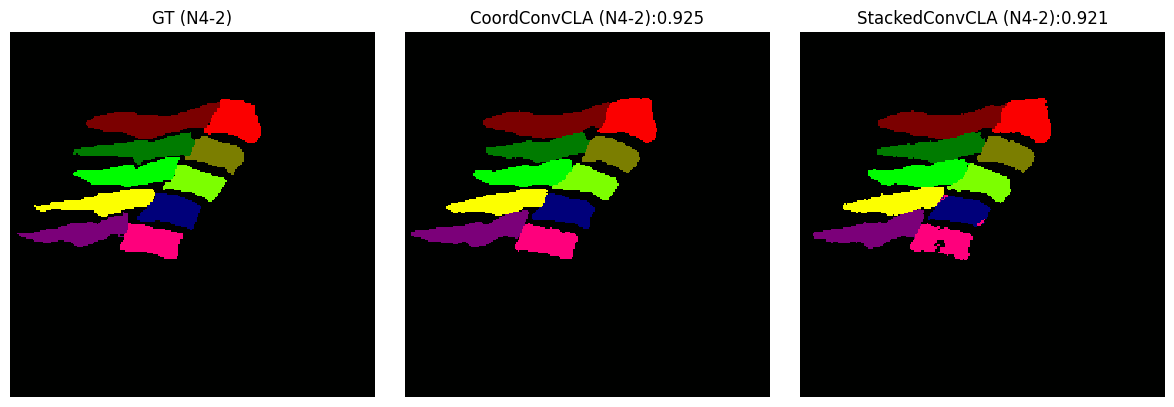

[ WARN:0@20085.154] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N4-3.png'): can't open/read file: check file path/integrity
[ WARN:0@20085.154] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250917-MCU-ClaheOnly-Stacked/fold4/crf/N4-3.png'): can't open/read file: check file path/integrity
[ WARN:0@20085.154] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N4-3.png'): can't open/read file: check file path/integrity
[ WARN:0@20085.156] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N4-4.png'): can't open/read file: check file path/integrity
[ WARN:0@20085.156] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250917-MCU-ClaheOnly-S

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N4-3.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-3.png
image: N4-3 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N4-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-4.png
image: N4-4 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N4-5.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-5.png
Count1 =  [58688, 1126, 661, 751, 514, 668, 550, 644, 531, 892, 511]
Count2 =  [58827, 1083, 718, 710, 512, 665, 512, 621, 483, 842, 563]
Count3 =  [58115, 1048, 647, 689, 491, 623, 492, 573, 462, 588, 496]
Dice =  [0.9890652257158661, 0.9488456315074695, 0.9383611312545322, 0.9431895961670089, 0.9571150097465887, 0.9347336834208552, 0.9265536723163842, 0.9059288537549407, 0.91124260

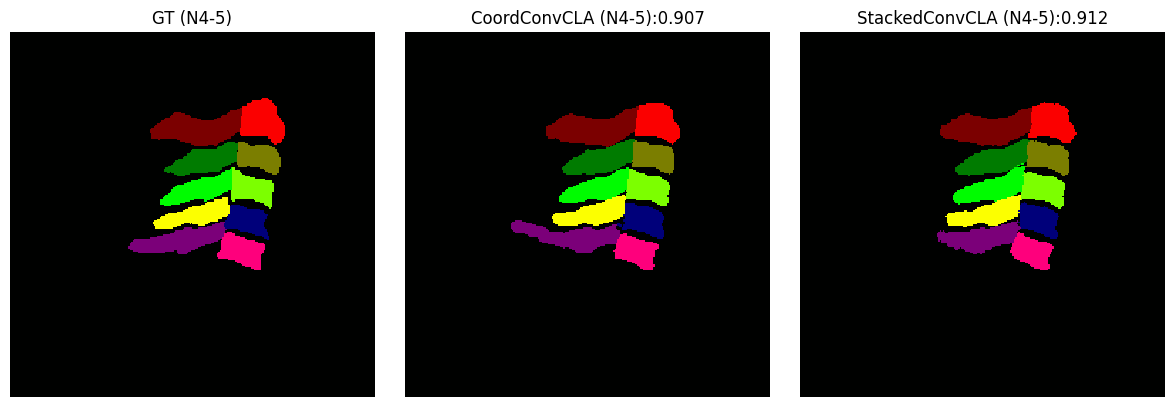

[ WARN:0@20085.335] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N4-6.png'): can't open/read file: check file path/integrity
[ WARN:0@20085.335] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250917-MCU-ClaheOnly-Stacked/fold4/crf/N4-6.png'): can't open/read file: check file path/integrity
[ WARN:0@20085.335] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N4-6.png'): can't open/read file: check file path/integrity
[ WARN:0@20085.336] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N4-7.png'): can't open/read file: check file path/integrity
[ WARN:0@20085.336] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250917-MCU-ClaheOnly-S

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N4-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-6.png
image: N4-6 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N4-7.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-7.png
image: N4-7 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N4-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-8.png
image: N4-8 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N4-9.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-9.png
image: N4-9 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N4-10.png
テストラベル: /home/eric/Documents/cervical

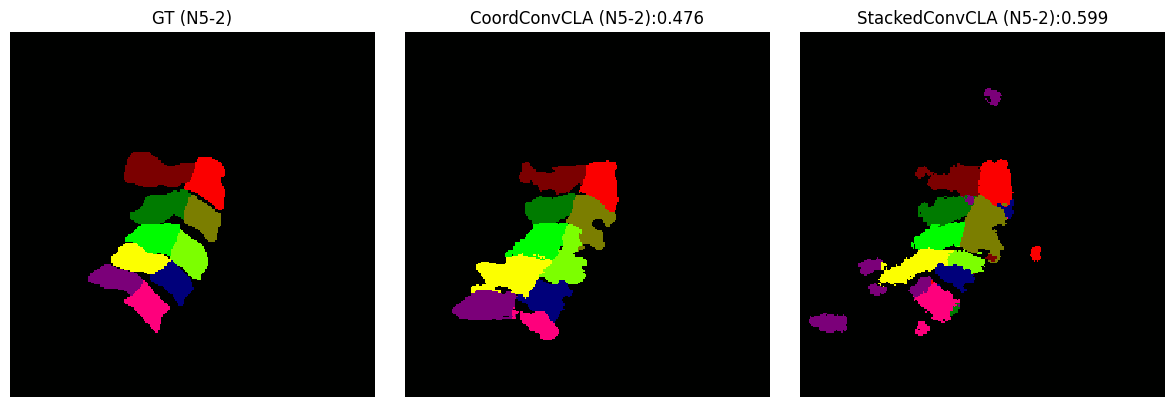

[ WARN:0@20085.521] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N5-3.png'): can't open/read file: check file path/integrity
[ WARN:0@20085.521] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250917-MCU-ClaheOnly-Stacked/fold4/crf/N5-3.png'): can't open/read file: check file path/integrity
[ WARN:0@20085.522] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N5-3.png'): can't open/read file: check file path/integrity


index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N5-3.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-3.png
image: N5-3 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N5-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-4.png
Count1 =  [58802, 991, 277, 664, 692, 936, 744, 1266, 258, 693, 213]
Count2 =  [60256, 848, 482, 567, 360, 598, 382, 536, 392, 686, 429]
Count3 =  [58032, 779, 253, 514, 301, 442, 1, 5, 0, 0, 0]
Dice =  [0.9748525928539031, 0.8471995649809679, 0.6666666666666666, 0.8350934199837531, 0.5722433460076045, 0.576271186440678, 0.0017761989342806395, 0.005549389567147614, 0.0, 0.0, 0.0, 0.35047997725810986]
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250917-MCU-ClaheOnly-Stacked/fold4/crf/N5-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-4.pn

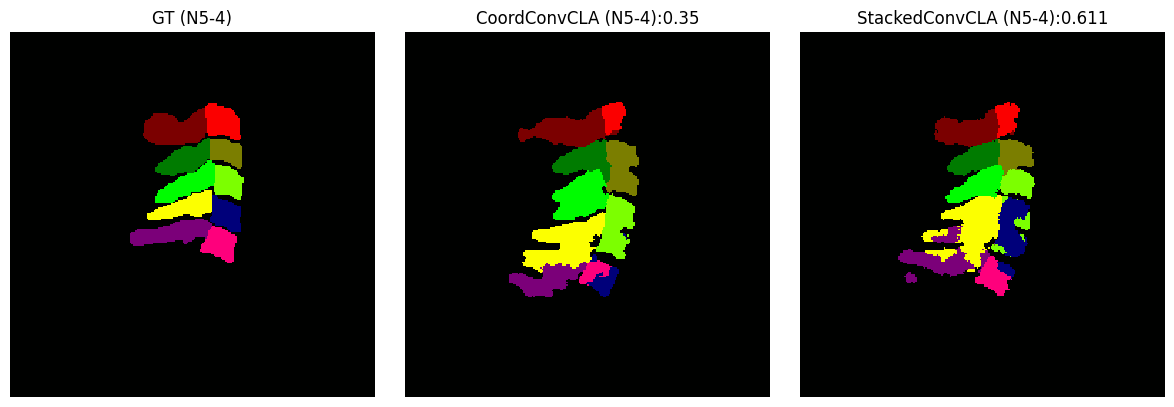

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N5-5.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-5.png
image: N5-5 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N5-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-6.png
image: N5-6 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N5-7.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-7.png
image: N5-7 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N5-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-8.png
image: N5-8 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N5-9.png
テストラベル: /home/eric/Documents/cervicalR

[ WARN:0@20085.704] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N5-5.png'): can't open/read file: check file path/integrity
[ WARN:0@20085.704] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250917-MCU-ClaheOnly-Stacked/fold4/crf/N5-5.png'): can't open/read file: check file path/integrity
[ WARN:0@20085.704] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N5-5.png'): can't open/read file: check file path/integrity
[ WARN:0@20085.705] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250920-Clahe-CoordConv/fold4/crf/N5-6.png'): can't open/read file: check file path/integrity
[ WARN:0@20085.705] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250917-MCU-ClaheOnly-S

In [36]:

fold = "fold4"
imgs_name = []
for i in range(5):
    for j in range (10):
        imgs_name.append(f"N{i+1}-{j+1}")

searchdir =  searchdir + "/" + fold + "/crf"
searchdir2 = searchdir2 + "/"  + fold + "/crf"
    

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
for img_name in imgs_name:
    try:
        img_label = cv2.imread(labeled_dir + "/" + img_name + ".png", cv2.IMREAD_GRAYSCALE) 
        img = cv2.imread(searchdir + "/" + img_name + ".png", cv2.IMREAD_GRAYSCALE)
        img2 = cv2.imread(searchdir2 + "/" + img_name + ".png", cv2.IMREAD_GRAYSCALE)
        
        
        Dice1 = cal_DiceMulitple(searchdir, [img_name])
        df = pd.DataFrame(Dice1)
        df = df.T

        Dice2 = cal_DiceMulitple(searchdir2, [img_name])
        df = pd.DataFrame(Dice2)
        df = df.T
        
        
        

        fig, axes = plt.subplots(1, 3, figsize=(12, 4)) # figsize=(width, height) in inches
        colors = ['#000100', '#7B0000', '#FB0000', '#007B00', '#7B7E00', '#00FC00', '#7CFF00', '#FCFF00', '#00007A', '#7B0079', '#FE007C']
        cmap = ListedColormap(colors[:11])
        
        # 1. Plot the first image
        axes[0].imshow(img_label, cmap=cmap, vmin=0, vmax=10, interpolation='nearest')
        axes[0].set_title(f'GT ({img_name})') # Caption for the first plot
        axes[0].axis('off') # Hide axis

        # 2. Plot the first image
        axes[1].imshow(img, cmap=cmap, vmin=0, vmax=10, interpolation='nearest')
        axes[1].set_title(f'CoordConvCLA ({img_name}):{np.round(Dice1[-1], 3)}') # Caption for the first plot
        axes[1].axis('off') # Hide axis

        # 3. Plot the second image
        axes[2].imshow(img2, cmap=cmap, vmin=0, vmax=10, interpolation='nearest')
        axes[2].set_title(f'StackedConvCLA ({img_name}):{np.round(Dice2[-1], 3)}') # Caption for the second plot
        axes[2].axis('off') # Hide axis

        # 5. Adjust layout to prevent titles from overlapping and display the plot
        plt.tight_layout()
        plt.show()
    except:
        print(f"image: {img_name} not found")